# Importing

In [1]:
pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyforest
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

# Ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading file

In [5]:
df=pd.read_csv("Fraud_check.csv")
df

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Exploration

In [6]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
print(df.shape)
df.info()

(600, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [11]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)

In [12]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [13]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,0,1,50047,10,YES
1,YES,2,1,134075,18,YES
2,NO,1,1,160205,30,YES
3,YES,0,1,193264,15,YES
4,NO,1,1,27533,28,NO


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,YES
1,1,2,1,134075,18,YES
2,0,1,1,160205,30,YES
3,1,0,1,193264,15,YES
4,0,1,1,27533,28,NO


In [16]:
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0


In [17]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [18]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [20]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])

In [21]:
df.head()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0


In [22]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [24]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1


In [25]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [27]:
Y=pd.DataFrame(Y)
Y

<IPython.core.display.Javascript object>

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [29]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 5), (480, 1), (120, 5), (120, 1))

In [45]:
from sklearn.model_selection import GridSearchCV

In [31]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}

In [46]:
grid=GridSearchCV(model,parameters,cv=10)

In [50]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [49]:
grid.best_score_

0.7729166666666666

In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 2}

In [36]:
final_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth= 4,
 max_features=4,random_state=12)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_split=4, random_state=12)

In [37]:
y_test_pred=final_model.predict(x_test)
y_test

,Taxable.Income
290,1
383,1
353,1
262,1
234,1
...,...
20,1
391,1
207,0
43,1


In [38]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.7604166666666666

In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.85      0.99      0.91       102

    accuracy                           0.84       120
   macro avg       0.42      0.50      0.46       120
weighted avg       0.72      0.84      0.78       120



In [40]:
df.columns

Index(['Taxable.Income', 'Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

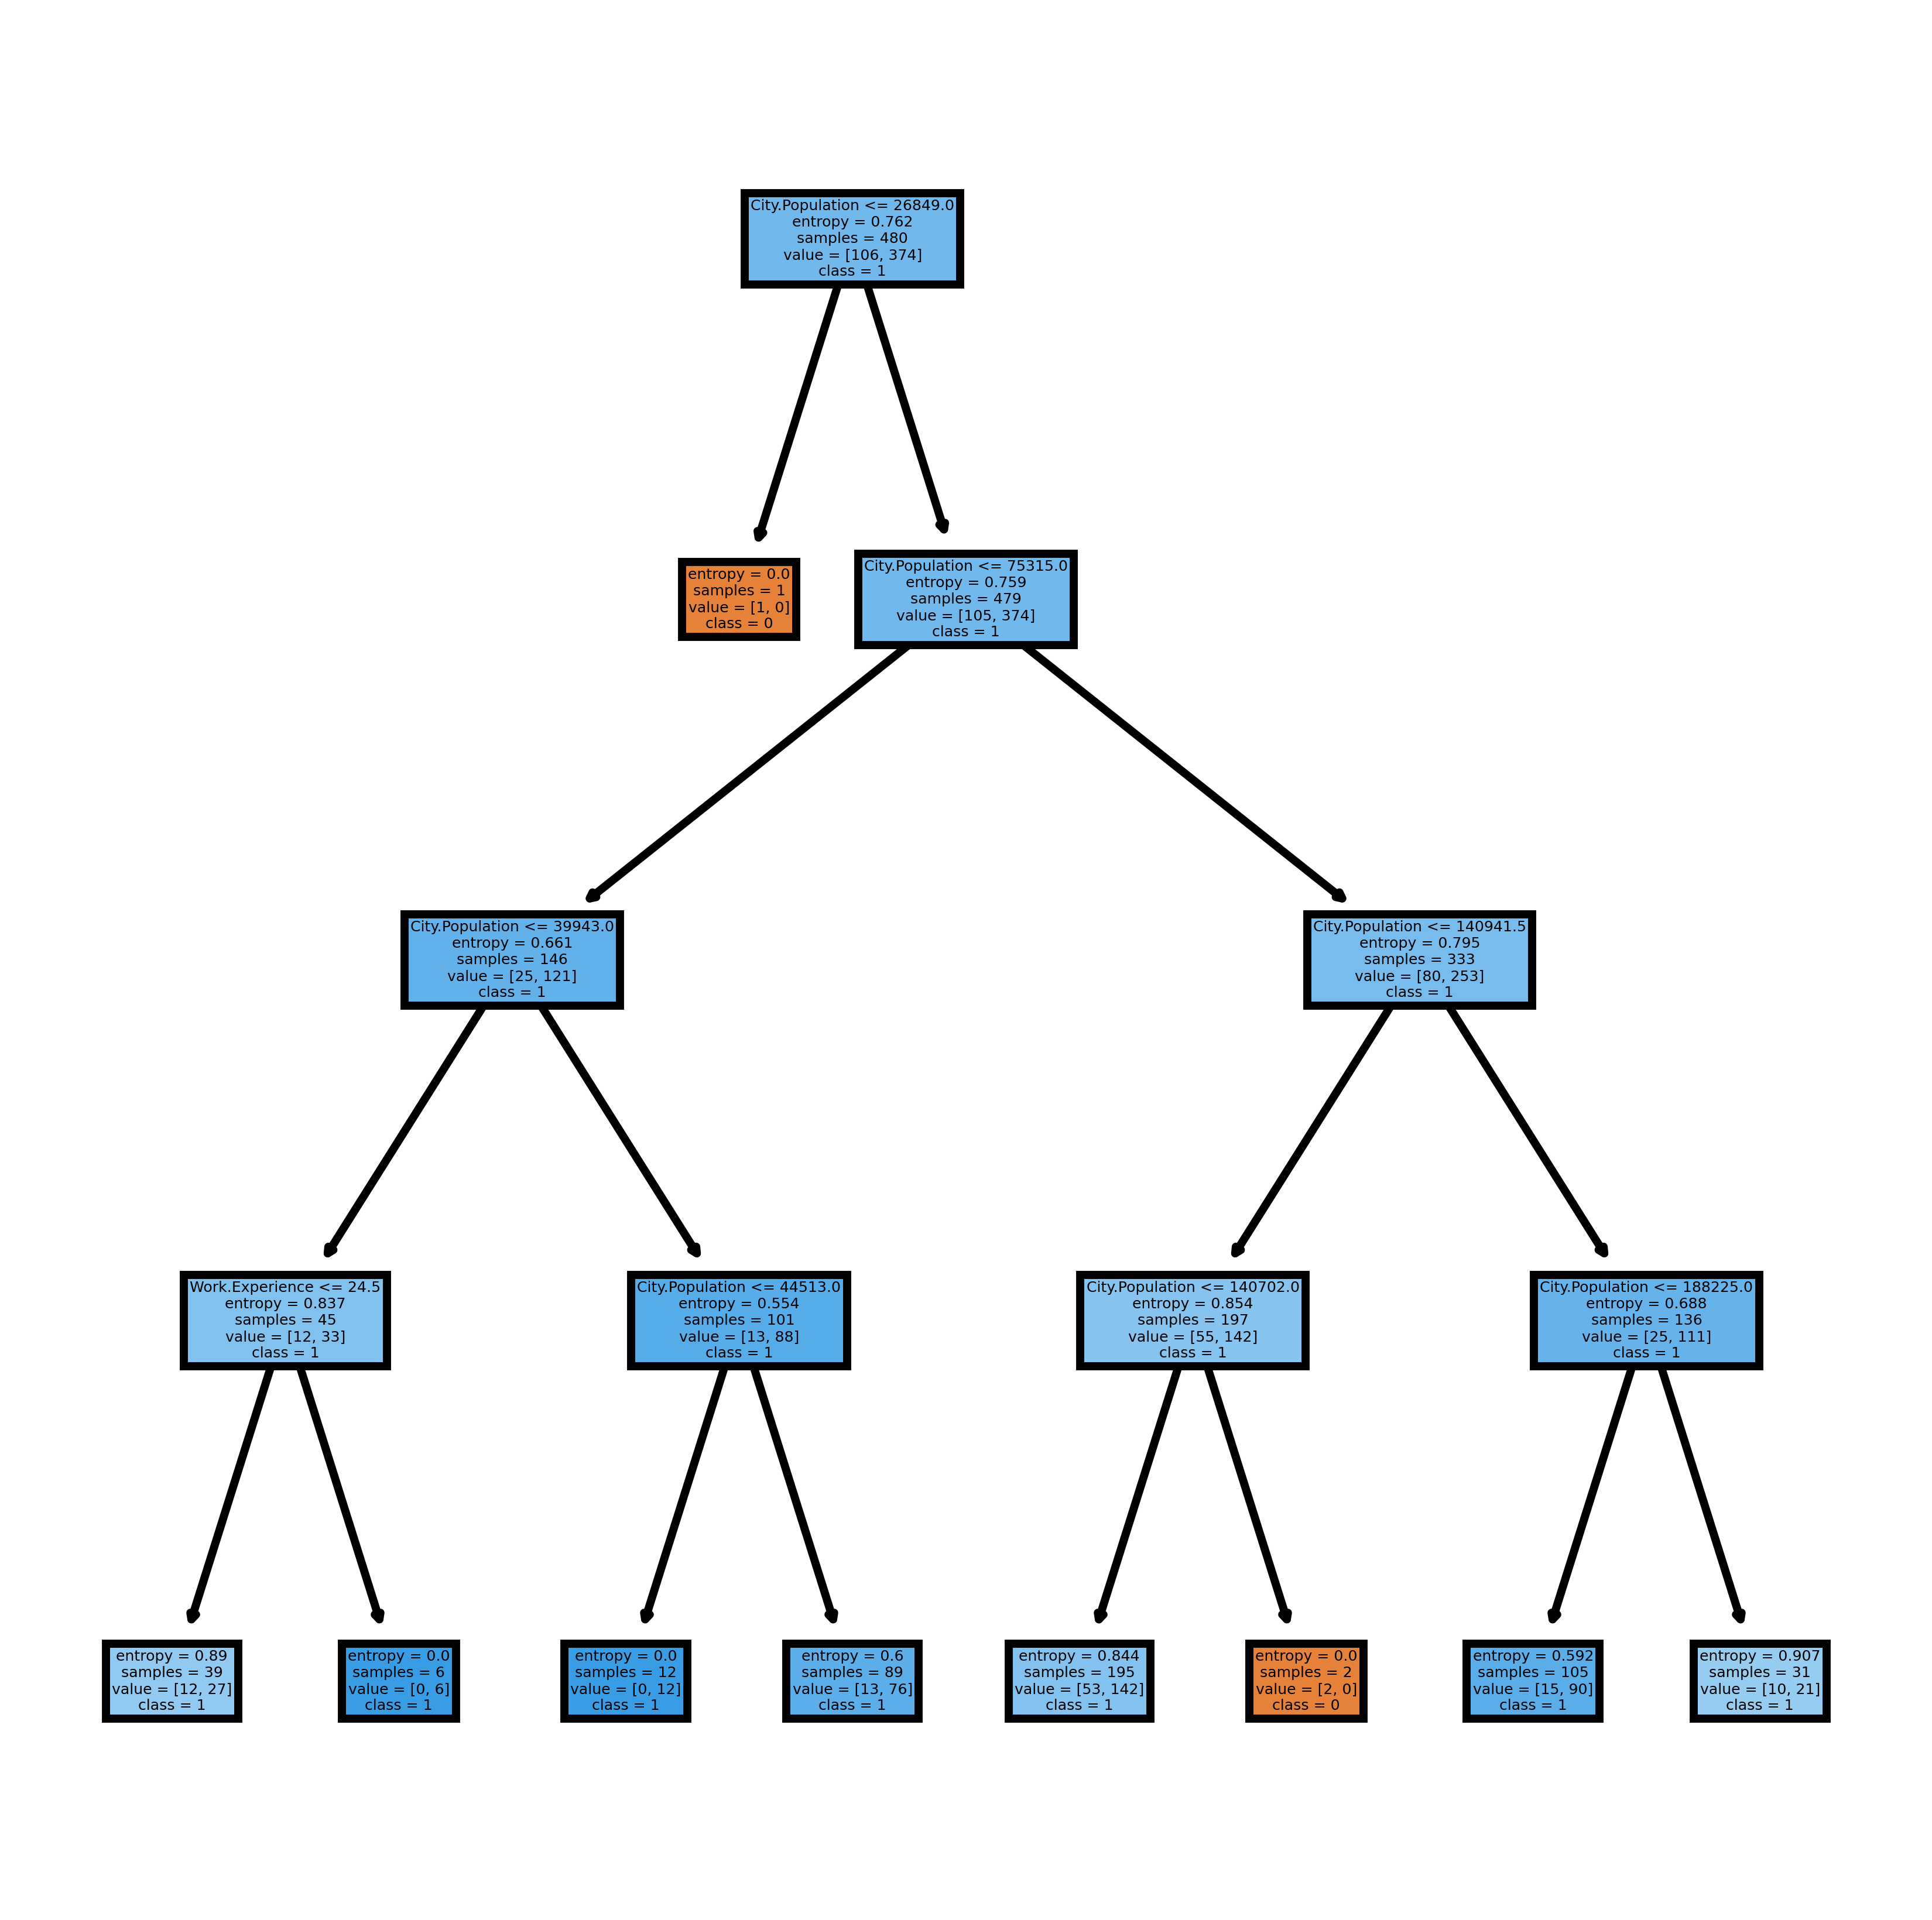

In [43]:
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(final_model,feature_names=fn,class_names=cn,filled=True)
plt.show()